<a href="https://colab.research.google.com/github/Lucas-Melo-A-S/Data_Science/blob/main/Churn_Prediction_para_uma_empresa_de_Telecomunica%C3%A7%C3%B5es_Lucas_Melo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*  

---

# Churn Prediction

*Churn rate*, ou simplesmente *churn*, representa a taxa de evasão da sua base de clientes. Em serviços como Spotify ou Netflix, ela representaria a taxa de cancelamento de assinaturas.

<p align=center>
<img src="https://raw.githubusercontent.com/carlosfab/dsnp2/master/img/churnrate.jpg" width="60%"></p>

Ela é de extrema importância para a administração e sua análise ao longo do tempo pode mostrar que existe algum problema que deve ser atacado.

*Churn* também pode ser usado para identificar potenciais cancelamentos, com um tempo de antecedência, e promover ações direcionadas para tentar reter tais clientes. Essa métrica deve receber atenção pelo fato de que o Custo de Aquisição de Cliente (CAC) é normalmente mais alto que o custo para mantê-los. Ou seja, um alto valor para o *churn rate* é o que não desejamos.

## Aquisição dos Dados

Os dados utilizados neste projeto foram originalmente disponibilizados na [plataforma de ensino da IBM Developer](https://developer.ibm.com/technologies/data-science/patterns/predict-customer-churn-using-watson-studio-and-jupyter-notebooks/#), e tratam de um problema típico de uma companhia de telecomunicações. O *dataset* completo pode ser encontrado [neste link](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv).

Apesar de não haver informações explícitas disponíves, os nomes das colunas permitem um entendimento a respeito do problema.

In [107]:
# importar os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# importar os dados
DATA_PATH = "https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(DATA_PATH)

# ver as 5 primeiras entradas
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Lembrete: 
Churn YES - saiu da plataforma
Churn No - não saiu da plataforma

#Conhecendo o Banco de Dados

O dataset possue 19 colunas que podem ser:

**gender:** Se o cliente é homem(male) ou mulher(female).

**SeniorCitizen:** Se o cliente é um senhor de idade ou não ( 0, 1).

**Partner:** Se o cliente tem parceiro ou não (Yes, No).

**Dependents:** Se o cliente tem dependentes ou não (Yes, No).

**tenure:** Numero de meses que o cliente ficou na companhia.

**Contract:** Tipo de contrato com o cliente:
- Month-to-Month: Mensal;

- One year: Anual;

- Two year: A cada dois anos.

**PaperlessBilling:** Pagamento com ou sem boleto (Yes, No).

**PaymentMethod:** Método de Pagamento:

- Electronic check: Cheque Eletronico;

- Mailed check: Cheque por Email;

- Bank transfer (automatic): Transferência Bancária (automática);

- Credit Card (automatic)): Cartão de Crédito(automática).

**MontlyCharges:** O valor mensal cobrado ao cliente.

**TotalCharges:** Valor Total Cobrado ao cliente.

**PhoneService:** Se o cliente tem serviço telefonico (Yes, No).

**MultipleLines:** Se o cliente tem multiplas linhas telefonicas (No phone service, No, Yes).

**InternetServices:** Se o cliente tem serviço de internet e qual (DSL, Fiber optic, No);

**OnlineSecurity:** Se o cliente tem seguraça online (No internet service, No, Yes).

**OnlineBackup:** Se o cliente tem backup online ou não (No internet service, No, Yes);

**DeviceProtection:** Se o clinete tem proteção ao dispositivo ou não (No internet service, No, Yes).

**TechSupport:** Se o cliente tem suporte técnico ou não (No internet service, No, Yes).

**StreamingTV:** Se o cliente tem serviço de streaming de TV ou não (No internet service, No, Yes).

**StreamingMovies:** Se o cliente tem serviço de straming de filme ou não (No internet service, No, Yes).


Esses dados podem até ser divididos em:

- Informações Demográficas
- Informações da conta
- Serviços

#Analise do Banco de Dados

In [108]:
print(f'     Entrada: {df.shape[0]}    ')
print(f'     Variáveis: {df.shape[1]}  ')

     Entrada: 7043    
     Variáveis: 21  


O dataset possui 21 variaveis (colunas) e 7043 entradas(linhas)

In [109]:
for column in df.columns:
    print('Column: {} - Unique Values: {} - Type: {}'.format(column, df[column].unique(),df[column].dtypes))

Column: customerID - Unique Values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK'] - Type: object
Column: gender - Unique Values: ['Female' 'Male'] - Type: object
Column: SeniorCitizen - Unique Values: [0 1] - Type: int64
Column: Partner - Unique Values: ['Yes' 'No'] - Type: object
Column: Dependents - Unique Values: ['No' 'Yes'] - Type: object
Column: tenure - Unique Values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39] - Type: int64
Column: PhoneService - Unique Values: ['No' 'Yes'] - Type: object
Column: MultipleLines - Unique Values: ['No phone service' 'No' 'Yes'] - Type: object
Column: InternetService - Unique Values: ['DSL' 'Fiber optic' 'No'] - Type: object
Column: OnlineSecurity - Unique Values: ['No' 'Yes' 'No internet service'] - Type: object
Column: OnlineBackup

In [110]:
df.isnull().sum().sort_values()

customerID          0
MonthlyCharges      0
PaymentMethod       0
PaperlessBilling    0
Contract            0
StreamingMovies     0
StreamingTV         0
TechSupport         0
DeviceProtection    0
TotalCharges        0
OnlineBackup        0
InternetService     0
MultipleLines       0
PhoneService        0
tenure              0
Dependents          0
Partner             0
SeniorCitizen       0
gender              0
OnlineSecurity      0
Churn               0
dtype: int64

In [111]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [112]:
#Verificando a presença de valores nulos

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Verificando a quantidade de entrada (7043) podemos constatar que todos as colunas possuem a mesma quantidade, chegando a conclusão que nesse dataframe não tem valores nulos. Mas ao utilizarmos a função 'info' constatamos que a coluna 'TotalCharges' constatava que seu tipo era "objeto", fazendo com que fosse necessário mudar o tipo da coluna para assim realizarmos a verificação novamente.

In [113]:
 df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors = 'coerce')

In [114]:
#Verificação após a mudança:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Após a mudança de *"TotalCharges"* para numericos, pode ser observado a falta de valores(celulas em branco), quando a coluna estavam do tipo "objeto" estas celulas constavam como se estivessem preenchidas (" "), após a mundança do tipo da coluna essas celulas foram tansformadas em NAN. Deve-se prestar bastante atenção com a situação, pois se caso não for observado pode comprometer todo o processo no treinamento para os modelos.

Nessa situação, não irei preencher os valores pois não quero dar medianas ou valores errados para cobranças para que meu sistema não seja levado para algum determinado lado. Para essa situação, eu escolhi dessa maneira, mas alguns podem preencher (com mediana, média, zeros) pois são apenas 11 valores e possivelmente não irá influenciar tanto no sistema.


In [115]:
df = df.dropna(subset = ['TotalCharges'], axis = 0)

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [117]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


Podemos tambêm verificar que não se tem a presença de outliners, já que a diferença de 75% para Max está dentro da variação existente entre os quartz.

In [118]:
#Colocar o grafico violino 

In [119]:
#Mudando PaymentMethods

df.PaymentMethod = df.PaymentMethod.replace(['Bank transfer (automatic)','Credit card (automatic)'],['Bank transfer','Credit card'])

Essa mudança foi realizada apenas para melhor compreensão e estetica da coluna.


No     5163
Yes    1869
Name: Churn, dtype: int64


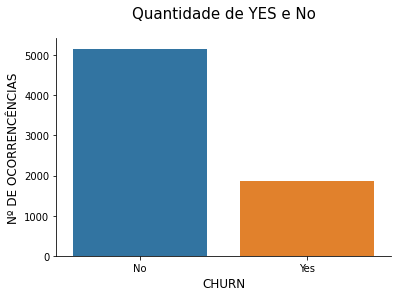

In [120]:
#Verificando os SIM e Não da coluna churn

fig,ax = plt.subplots(nrows= 1, ncols = 1, figsize = (6,4))
sns.countplot(x = df.Churn, data = df)

ax.set_title('Quantidade de YES e No',
             fontsize = 15,
             color = 'black',
             loc = 'center',
             pad = 20)
ax.set_xlabel ('CHURN', fontsize = 12)
ax.set_ylabel ('Nº DE OCORRENCÊNCIAS', fontsize = 12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

print(df.Churn.value_counts())

Fazendo uma analise um pouco mais detalhada, eu resolvi não balancear o dataset em relação a quantidade de "yes" e "no", isso se deu devido a cada 1x "yes" eu tenho 3x "No", sendo essa diferença não sendo tão discrepante e não influênciando tanto assim no nosso resultado final.

5163/1869 = 2,76 =~ 3

#Ajustando os dados

Nessa situação estamos apenas verificando a quantidade de vezes que cada valor unico das colunas do tipo "objeto" se relacionam com os valores unicos da coluna "Churn" ("Yes","No"). Ou seja quantas vez cada valor unico da coluna aparece quando a coluna "Churn" é "No" ou "Yes"


In [121]:
print(pd.crosstab([df.gender,df.SeniorCitizen],df.Churn).apply(lambda x: x/x.sum()*100, axis=1))
print(pd.crosstab(df.gender,df.Churn))

Churn                        No        Yes
gender SeniorCitizen                      
Female 0              76.020583  23.979417
       1              57.746479  42.253521
Male   0              76.672269  23.327731
       1              58.885017  41.114983
Churn     No  Yes
gender           
Female  2544  939
Male    2619  930


In [122]:
for coluna in df.columns:
  if df[coluna].dtypes == 'object' and df[coluna] is not (df['Churn']) and df[coluna] is not (df['customerID']) :
    print("------------")
    print(pd.crosstab(df[coluna],df.Churn))
    print("------------")

------------
Churn     No  Yes
gender           
Female  2544  939
Male    2619  930
------------
------------
Churn      No   Yes
Partner            
No       2439  1200
Yes      2724   669
------------
------------
Churn         No   Yes
Dependents            
No          3390  1543
Yes         1773   326
------------
------------
Churn           No   Yes
PhoneService            
No             510   170
Yes           4653  1699
------------
------------
Churn               No  Yes
MultipleLines              
No                2536  849
No phone service   510  170
Yes               2117  850
------------
------------
Churn              No   Yes
InternetService            
DSL              1957   459
Fiber optic      1799  1297
No               1407   113
------------
------------
Churn                  No   Yes
OnlineSecurity                 
No                   2036  1461
No internet service  1407   113
Yes                  1720   295
------------
------------
Churn                

In [123]:
from numpy.core.fromnumeric import size
import math
def plot_bar (list):

  lista=[]
  lista.extend(list)

  nrow = math.ceil((len(lista)/2))
  
  fig,ax = plt.subplots(nrows= nrow, ncols = 2, figsize = (30,15))

  index = 0
  ax = ax.ravel()

  for coluna in lista :
    if df[coluna].dtypes == 'object' and df[coluna] is not (df['Churn']):
      pd.crosstab(df[coluna],df.Churn).plot(kind = 'bar', ax=ax[index], stacked = True,
                                            rot = 0, color = ['springgreen','salmon'])
      
      #title
      ax[index].set_title('Proportion of observations by ' + coluna,
                     fontsize=20, loc='center')
       
      #Spine
      ax[index].spines['top'].set_visible(False)
      ax[index].spines['right'].set_visible(False)

      #Legend
      ax[index].legend(loc="upper right", bbox_to_anchor=(0.55, 0.5,0.5,0.5),
                  title='Churn', fancybox=True,fontsize = 17)

      ax[index].tick_params(rotation='auto')
      index += 1
      fig.tight_layout()

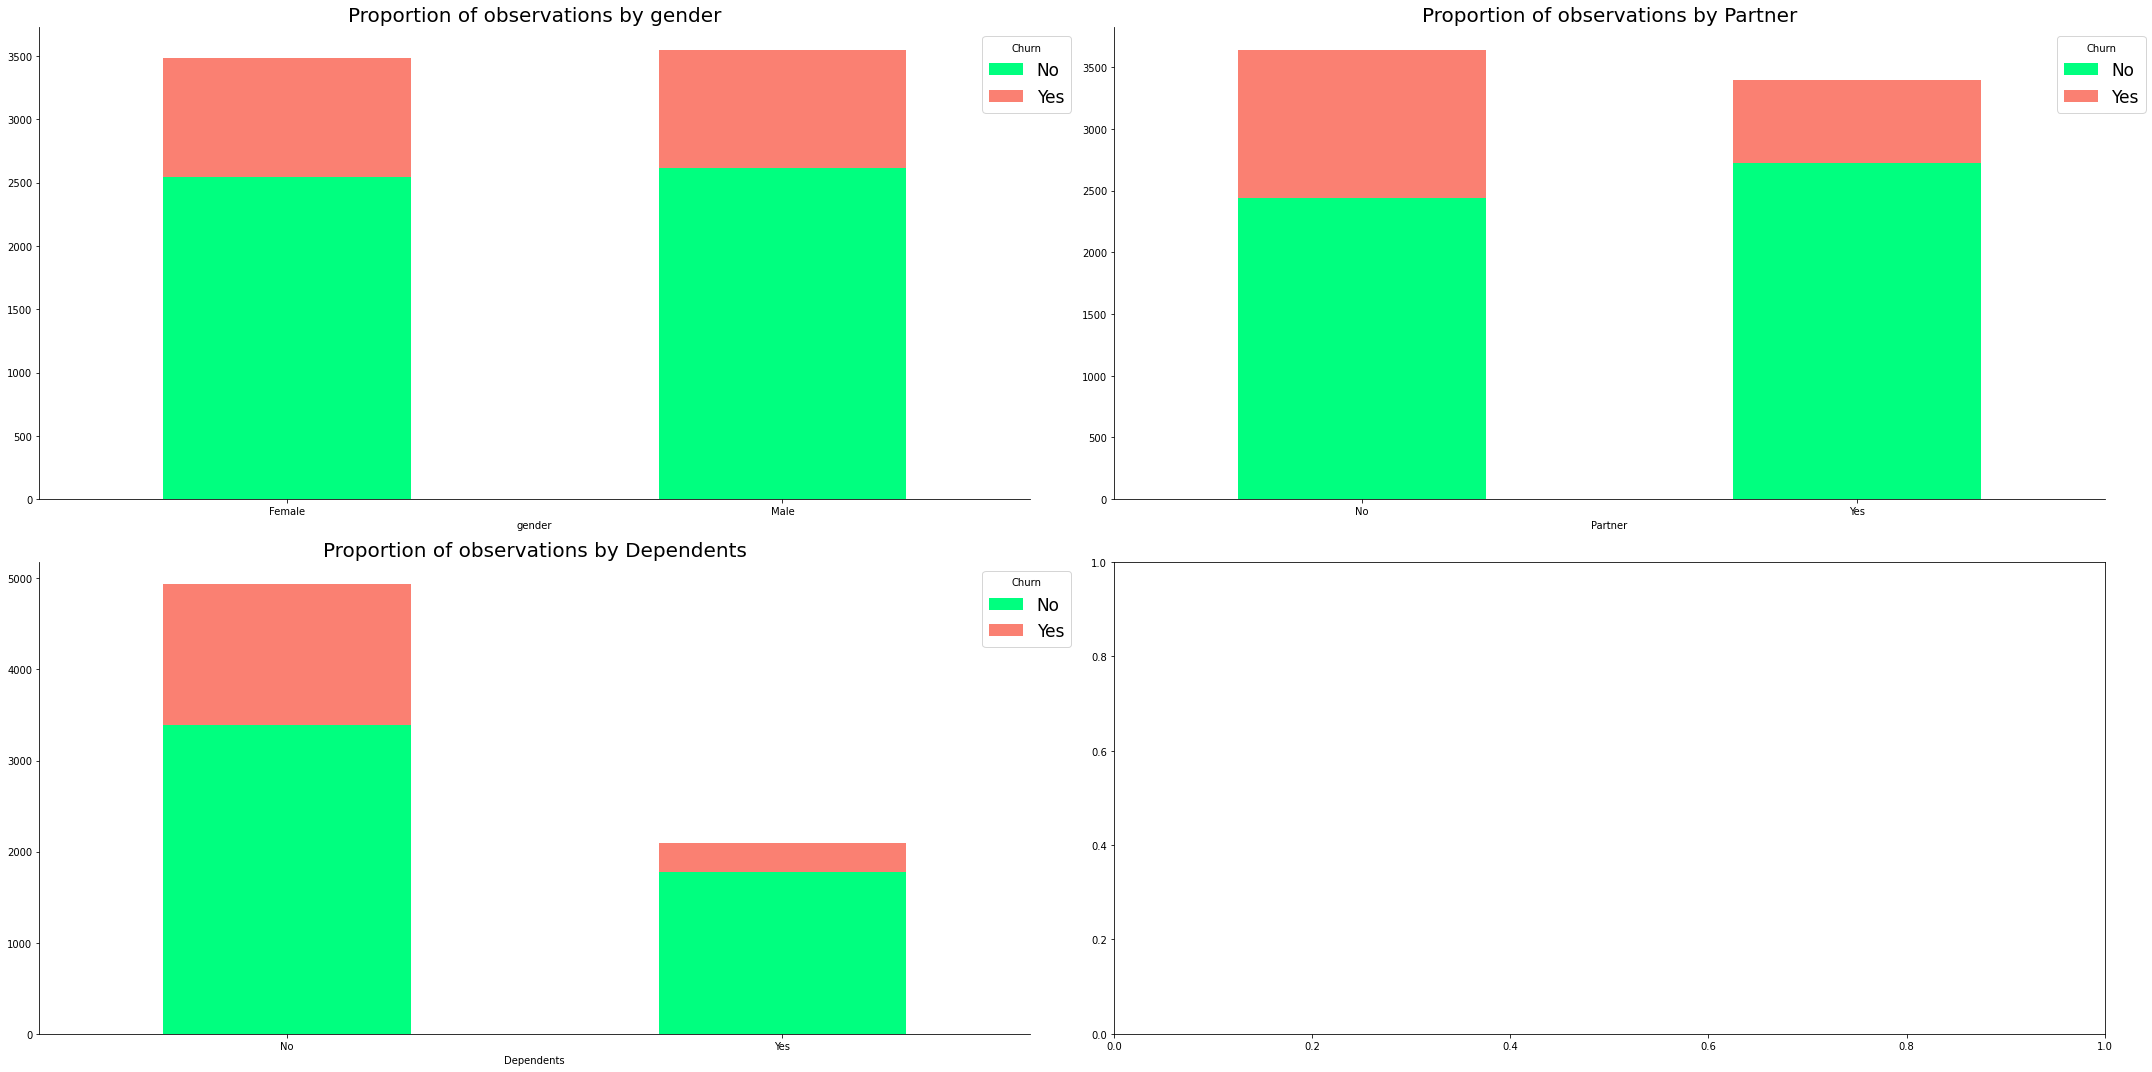

In [124]:
demographic_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

plot_bar(demographic_columns)

Ideias retiradas do analise gráfico:
- O gênero não tem influência na saida ou permanência na companhia;
- Pessoas com parceiros tem uma tendência um pouco maior de permanecer na companhia.
- Pessoas sem dependentes(filhos/agregados/amigos) dividindo a conta tem uma tendência maior a sair da empresa.

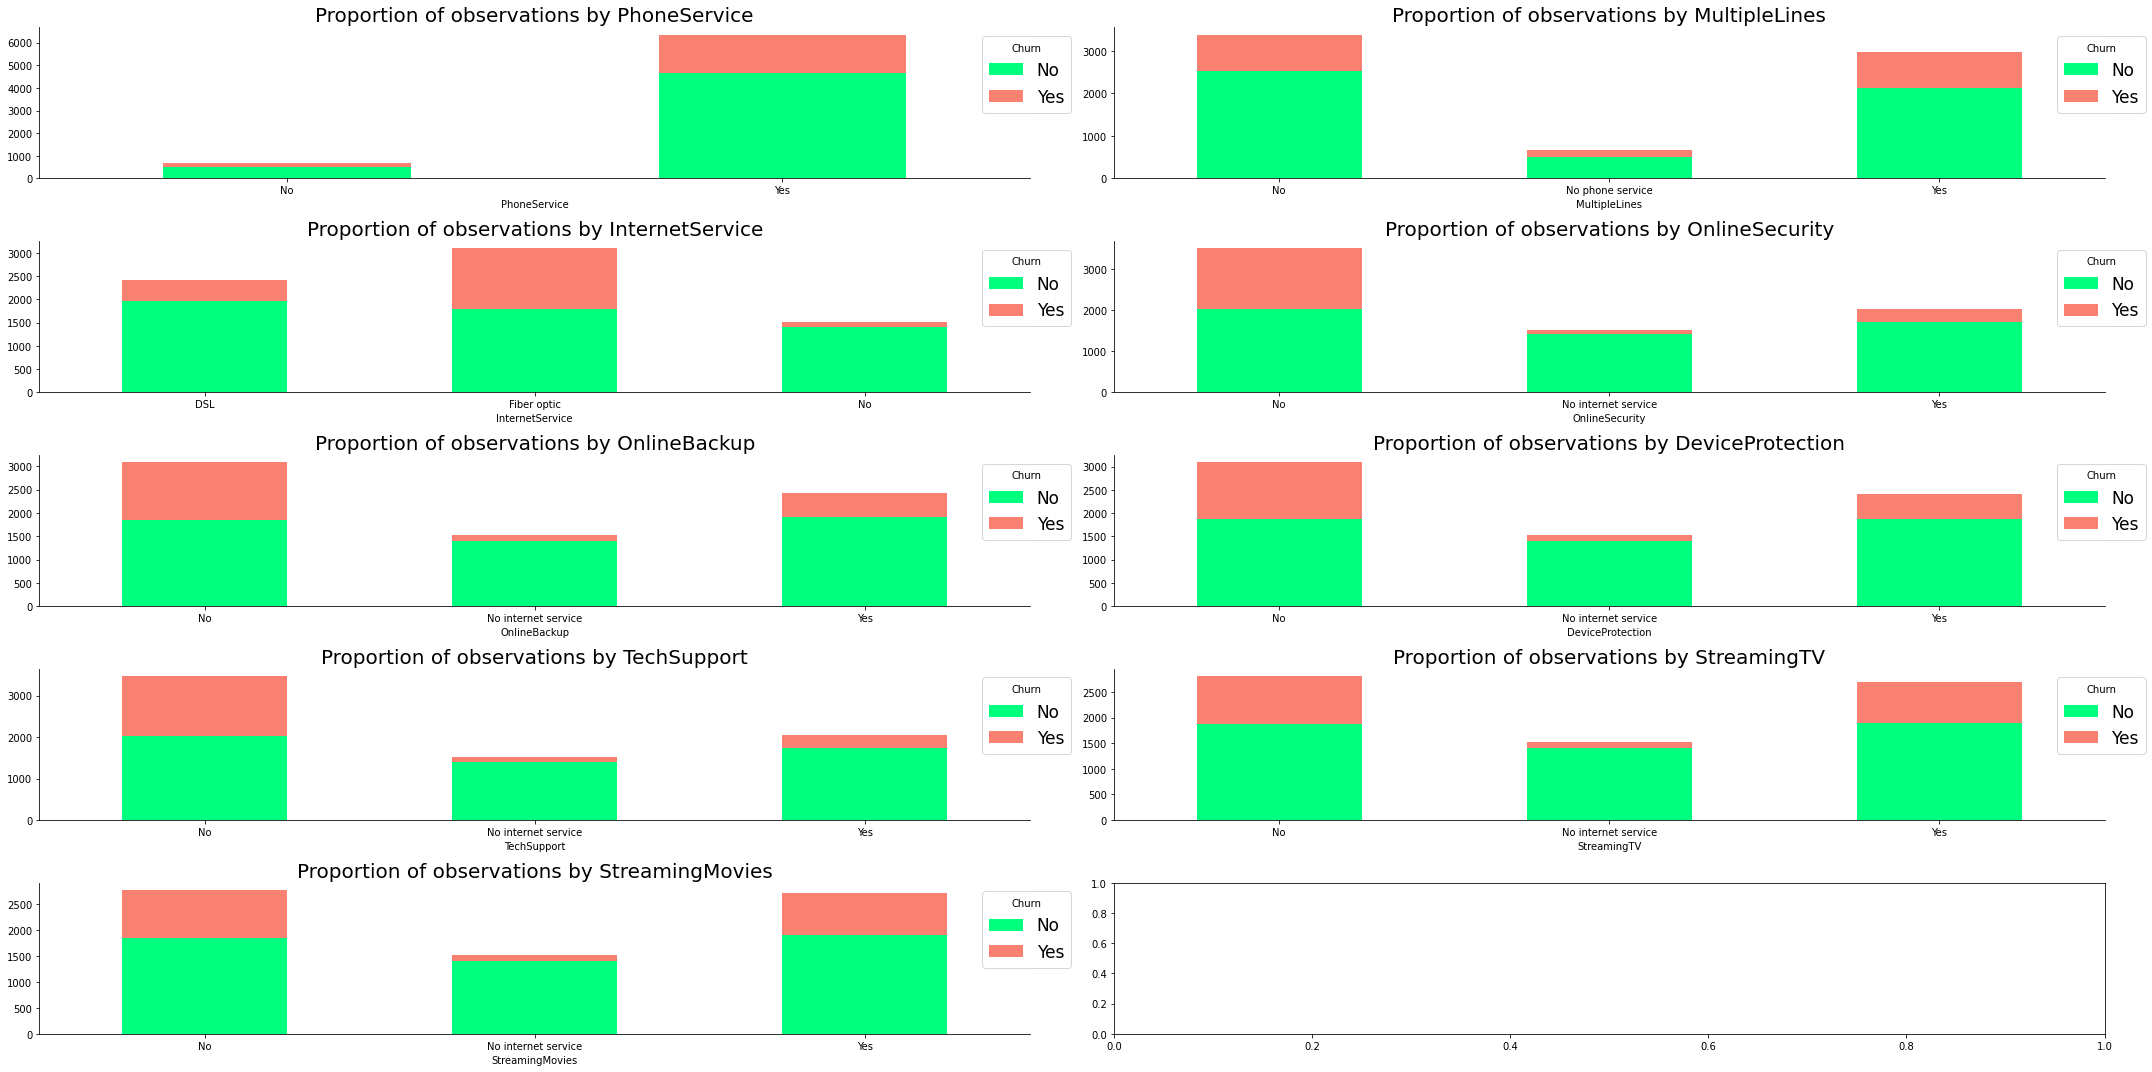

In [125]:
services = ['PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies']

plot_bar(services)

Resusltados:]
- O serviço telefonico não influêmcia tanto na saida do cliênte;
- O serviço de fibra optica é o algo que deve ser visto e analisado pela empresa, já que o serviço de melhor qualidade dela(fibra optica) está tendo uma taxa de churn maior que o dre internet discada[algo que devemos procurar]
- Serviços que não tem suporte tecnico, proteção extra e backup online são aqueles com maior taxa de desistência. [Melhorar os pacotes com esses serviços]
- Serviços de streaming ajudam bastante em manter os clientes na empresa.

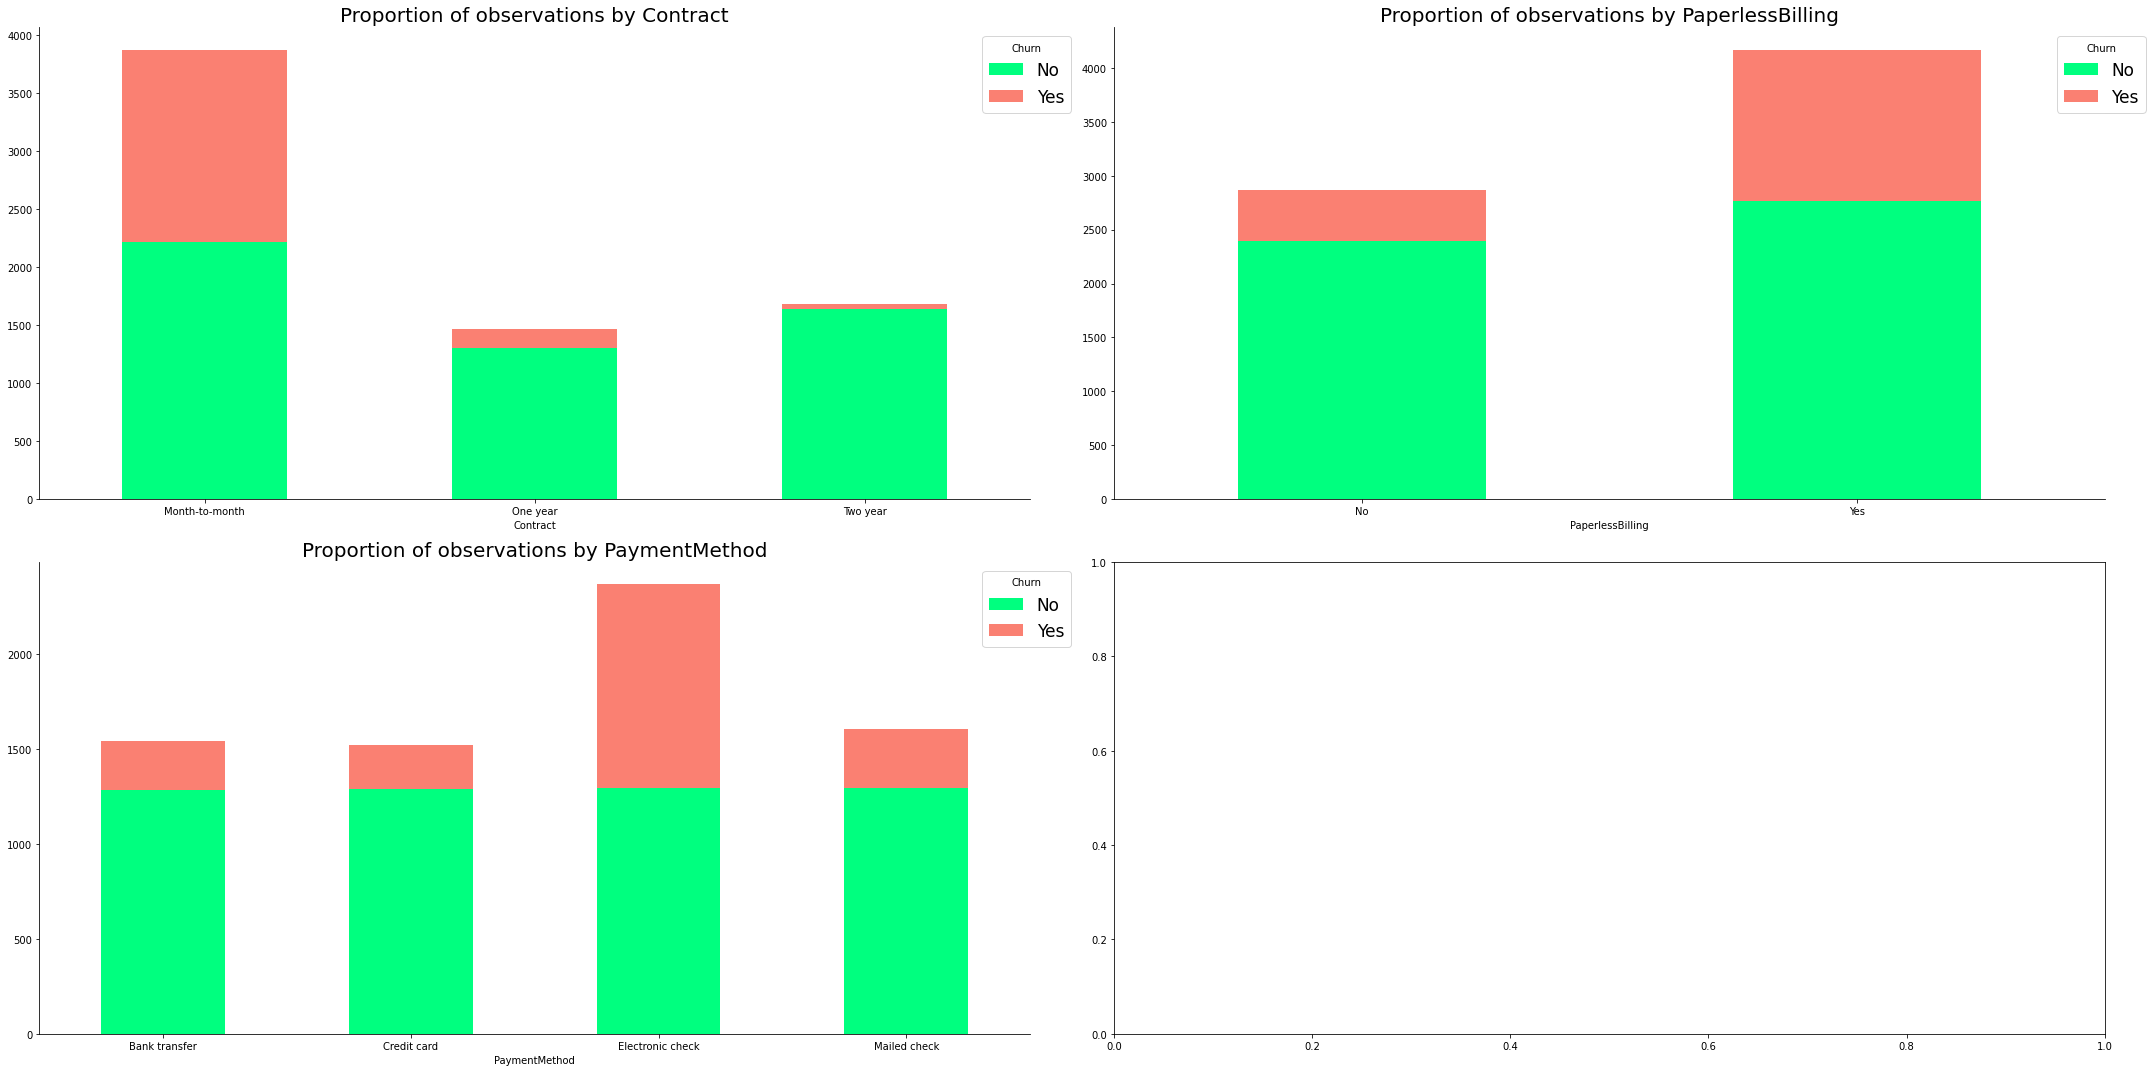

In [126]:
contract = ['Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges']

plot_bar(contract)

- Contratos feitos mensalmente são mais faceis e tem maior probabilidade da pessoa cancelar durante o uso;
- Pagamento que são enviados boletos ou se utilizam papel também tem um grnade influência no chrurn de clientes;
- A utilização de cheque eletronico tem quase 50% de possibilidade de ter um churn (40%)

MODIFICAÇÕES A SEREME FEITAS NOS GRÁFICOS:
- Colocar a porcentagem nos graficos
- Aumentar os titulos e sticks


Brainstorm:
- Como ja tenho os valores que eu quero chegar, utilizarei uma abordagem de Aprendizado Supervisionado, onde minha coluna a ser utilizada será a "Churn", com essa conseguirei utilizar as outras colunas para que se tenha um aprendizado da maquina.

- Ideias para se utilizar no projeto:
    - Eu quero saber o quanto o a falta desses serviços influênciam na saida do serviço de telefonia;

- Na minha consepção não será necessario balancear nenhuma coluna.

#Lidando com variáveis Catégoricas

Fazendo a analise dos dados, foi constatado que a coluna 'CustomerId' não irá influenciar em nada nosso estudo, então para evitar quaisquer problemas a coluna será retirada.

In [127]:
df = df.drop(columns = 'customerID')

Transformando todos os 'sim' e 'não' e 'man' e 'femele' em numeros binarios.

Na analise feita as colunas que possuem 3 variaveis, sendo duas delas negativas uma delas pode ser padronizada com a outra já que as duas representam a mesma situação. Facilitando assim o estudo.

In [128]:
for i in df.columns:
  if len(df[i].unique()) == 3:
    df[i] = df[i].replace('No phone service','No')
    df[i] = df[i].replace('No internet service','No')

Para melhor organização as colunas serão separadas por tipos, aquelas  não binarias serão separadas em uma lista com nome 'Dummies', as colunas do tipo numeral serão separadas em uma lista e o restante serão transformadas em binárias.

Esssas listas criadas serão utilizadas mais na frente para possiveis ajustes.

In [129]:
coluna_dummies = []
coluna_numeral = []
for i in df.columns:
  if df[i] is df.gender:
    df.gender = df.gender.replace(['Female','Male'],[0,1])
  else:
    if len(df[i].unique()) == 2:
      df[i] = df[i].replace(['Yes','No'],[1,0])
    elif df[i].dtypes == 'object' and df[i] is not (df['Churn']):
      coluna_dummies.append(i)
    else:
      df[i] = df[i]
      coluna_numeral.append(i)

- Como foi observado ao durante a analise dos dados, algumas colunas não tem apenas dois valores unicos([sim ou nao] e [female e man]). Para tratar esse tipo de coluna com mais exatidão, já que nenhum valor é mais importante que o outro, vou utilizar o get_dummies, pois serão criadas novas colunas para cada valor da coluna e com isso eu poderei transformar em binarios para melhor comprenssão da maquina.

In [130]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()

std.fit(df[coluna_numeral])

df[coluna_numeral] = std.transform(df[coluna_numeral])

In [131]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,-1.280248,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,-1.161694,-0.994194,0
1,1,0,0,0,0.064303,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,-0.260878,-0.173740,0
2,1,0,0,0,-1.239504,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,-0.363923,-0.959649,1
3,1,0,0,0,0.512486,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer,-0.747850,-0.195248,0
4,0,0,0,0,-1.239504,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,0.196178,-0.940457,1


In [132]:
df = pd.get_dummies(data = df, columns = coluna_dummies)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,-1.280248,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0.064303,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,-1.239504,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0.512486,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,-1.239504,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


Agora após todo o processo de tratamento dos dados, iremos iniciar o processo de aprendizado da maquina.


#Separando os dados para Teste e Treino

In [133]:
X = df.drop('Churn', axis = 1)
y = df.Churn

In [134]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [135]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5625, 26)
(1407, 26)
(5625,)
(1407,)


In [136]:
print(pd.Series(y_train).value_counts())

0    4130
1    1495
Name: Churn, dtype: int64


In [137]:
from sklearn.metrics import confusion_matrix
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
gender,1.000000,-0.001819,-0.001379,0.010349,0.005285,-0.007515,-0.008883,-0.016328,-0.013093,-0.000807,...,0.007584,-0.011189,0.004745,-0.003251,0.007755,-0.003603,-0.015973,0.001632,0.000844,0.013199
SeniorCitizen,-0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,0.142996,-0.038576,0.066663,0.059514,...,-0.108276,0.254923,-0.182519,0.137752,-0.046491,-0.116205,-0.016235,-0.024359,0.171322,-0.152987
Partner,-0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,0.142561,0.143346,0.141849,0.153556,...,-0.001043,0.001235,-0.000286,-0.280202,0.083067,0.247334,0.111406,0.082327,-0.083207,-0.096948
Dependents,0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.024307,0.080786,0.023639,0.013900,...,0.051593,-0.164101,0.138383,-0.229715,0.069222,0.201699,0.052369,0.061134,-0.149274,0.056448
tenure,0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.332399,0.328297,0.361138,0.361520,...,0.013786,0.017930,-0.037529,-0.649346,0.202338,0.563801,0.243822,0.232800,-0.210197,-0.232181
PhoneService,-0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,0.279530,-0.091676,-0.052133,-0.070076,...,-0.452255,0.290183,0.171817,-0.001243,-0.003142,0.004442,0.008271,-0.006916,0.002747,-0.004463
MultipleLines,-0.008883,0.142996,0.142561,-0.024307,0.332399,0.279530,1.000000,0.098592,0.202228,0.201733,...,-0.200318,0.366420,-0.210794,-0.088558,-0.003594,0.106618,0.075429,0.060319,0.083583,-0.227672
OnlineSecurity,-0.016328,-0.038576,0.143346,0.080786,0.328297,-0.091676,0.098592,1.000000,0.283285,0.274875,...,0.320343,-0.030506,-0.332799,-0.246844,0.100658,0.191698,0.094366,0.115473,-0.112295,-0.079918
OnlineBackup,-0.013093,0.066663,0.141849,0.023639,0.361138,-0.052133,0.202228,0.283285,1.000000,0.303058,...,0.156765,0.165940,-0.380990,-0.164393,0.084113,0.111391,0.086942,0.090455,-0.000364,-0.174075
DeviceProtection,-0.000807,0.059514,0.153556,0.013900,0.361520,-0.070076,0.201733,0.274875,0.303058,1.000000,...,0.145150,0.176356,-0.380151,-0.225988,0.102911,0.165248,0.083047,0.111252,-0.003308,-0.187325


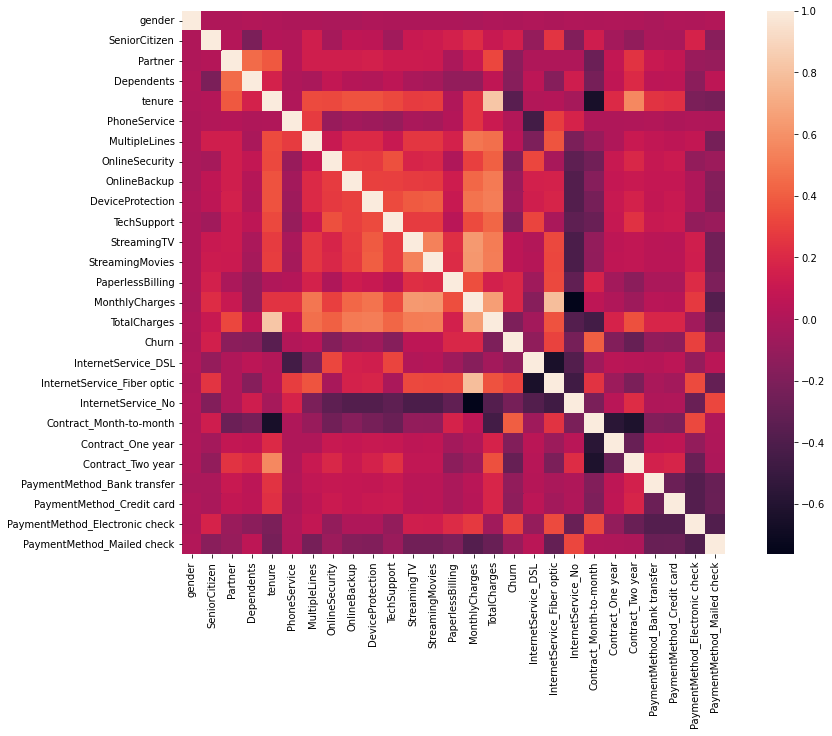

In [138]:
fig, ax = plt.subplots(figsize=(15
                                ,10))
sns.heatmap(df.corr(), fmt = '.2f', ax=ax, square = True, linecolor = 'white', annot_kws={'size': 20})
plt.show()

#Analisando os métodos

In [139]:
from sklearn.metrics import classification_report, accuracy_score

##Logistic Regression

In [140]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression(max_iter= 200)
lg.fit(X_train,y_train)

LogisticRegression(max_iter=200)

In [141]:
y_pred_lg = lg.predict(X_test)
lg_accuracy = accuracy_score(y_test,y_pred_lg) * 100
print('Relatório de Classificação:\n ', classification_report(y_test,y_pred_lg, digits = 2))
print(f'{lg_accuracy :.2f}')

Relatório de Classificação:
                precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.63      0.52      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

78.96


In [142]:
from sklearn.model_selection import cross_val_score

lg_recall = cross_val_score(lg,X_train,y_train, cv = 5, scoring = 'recall')
print(lg_recall)
print(lg_recall.mean())
print(lg_recall.std())

[0.57190635 0.56187291 0.51505017 0.5451505  0.58528428]
0.5558528428093645
0.024246914997179753


##ARVORE DE DECISÃO 


In [143]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth = 10,
                              random_state = 42,
                              criterion = 'entropy')
tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)

In [144]:
tree_pred = tree.predict(X_test)

tree_accuracy = accuracy_score(y_test,tree_pred) * 100
print('Relatório de Classificação:\n ', classification_report(y_test,tree_pred, digits = 2))
print(f'{tree_accuracy:.2f}%')

Relatório de Classificação:
                precision    recall  f1-score   support

           0       0.83      0.83      0.83      1033
           1       0.54      0.55      0.54       374

    accuracy                           0.75      1407
   macro avg       0.69      0.69      0.69      1407
weighted avg       0.76      0.75      0.76      1407

75.48%


Nesse momento irei uttilizar a função grid_search para encontrar os melhores criterios para esse método.

In [145]:
tree_recall = cross_val_score(tree,X_train,y_train, cv = 5, scoring = 'recall')
print(tree_recall)
print(tree_recall.mean())
print(tree_recall.std())

[0.55518395 0.55852843 0.54849498 0.4916388  0.47826087]
0.5264214046822742
0.034277265485803204


##SVM

In [146]:
from sklearn.svm import SVC

svc = SVC(random_state = 42)

svc.fit(X_train, y_train)


SVC(random_state=42)

In [147]:
svc_pred = svc.predict(X_test)

svc_accuracy = (accuracy_score(y_test,svc_pred) * 100)
print('Relatório de Classificação:\n ', classification_report(y_test,svc_pred, digits = 2))
print(f'{svc_accuracy:.2f}%')

Relatório de Classificação:
                precision    recall  f1-score   support

           0       0.83      0.91      0.87      1033
           1       0.65      0.48      0.55       374

    accuracy                           0.79      1407
   macro avg       0.74      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407

79.39%


In [148]:
svc_recall = cross_val_score(svc,X_train,y_train, cv = 5, scoring = 'recall')
print(svc_recall)
print(svc_recall.mean())
print(svc_recall.std())

[0.49832776 0.49832776 0.49498328 0.5083612  0.5451505 ]
0.5090301003344482
0.018609267883937856


##XGBOOST

In [149]:
from xgboost import XGBClassifier

xgb = XGBClassifier()

xgb.fit(X_train,y_train)

XGBClassifier()

In [150]:
xgb_pred = xgb.predict(X_test)

xgb_accuracy = (accuracy_score(y_test,xgb_pred) * 100)
print('Relatório de Classificação:\n ', classification_report(y_test,xgb_pred, digits = 2))
print(f'{xgb_accuracy:.2f}%')

Relatório de Classificação:
                precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407

78.96%


In [151]:
xgb_recall = cross_val_score(xgb,X_train,y_train, cv = 5, scoring = 'recall')
print(xgb_recall)
print(xgb_recall.mean())
print(xgb_recall.std())

[0.54849498 0.55183946 0.48829431 0.55183946 0.56187291]
0.5404682274247492
0.026470045401216544


##Random Forest

In [152]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(max_depth = 10,
                              criterion = 'entropy',
                              random_state = 42)

forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, random_state=42)

In [153]:
forest_pred = forest.predict(X_test)

forest_accuracy = (accuracy_score(y_test,forest_pred) * 100)
print('Relatório de Classificação:\n ', classification_report(y_test,forest_pred, digits = 2))
print(f'{xgb_accuracy:.2f}%')

Relatório de Classificação:
                precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.63      0.49      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

78.96%


In [154]:
forest_recall = cross_val_score(forest,X_train,y_train, cv = 5, scoring = 'recall')
print(forest_recall)
print(forest_recall.mean())
print(forest_recall.std())

[0.56187291 0.54180602 0.50167224 0.52508361 0.56856187]
0.5397993311036788
0.024449052685614786


##LightTGBM


In [155]:
import lightgbm as ltb

light = ltb.LGBMClassifier()

light.fit(X_train,y_train)

LGBMClassifier()

In [156]:
light_pred = light.predict(X_test)

light_accuracy = (accuracy_score(y_test,light_pred) * 100)
print('Relatório de Classificação:\n ', classification_report(y_test,light_pred, digits = 2))
print(f'{xgb_accuracy:.2f}%')

Relatório de Classificação:
                precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

78.96%


In [157]:
light_recall = cross_val_score(light,X_train,y_train, cv = 5, scoring = 'recall')
print(light_recall)
print(light_recall.mean())
print(light_recall.std())

[0.56521739 0.55183946 0.49498328 0.52842809 0.56521739]
0.5411371237458193
0.026705638498564704


#Avaliando as Métricas

In [158]:
print(f'Acurácia Suport Vector Machine: {svc_accuracy:.2f} / Recall: {svc_recall.mean():.2f}')
print(f'Acurácia Árvore de Decisão: {tree_accuracy:.2f} / Recall: {tree_recall.mean():.2f}')
print(f'Acurácia Regressão Logistica: {lg_accuracy:.2f} / Recall: {lg_recall.mean():.2f}')
print(f'Acurácia XGBOOST: {xgb_accuracy:.2f} / Recall: {xgb_recall.mean():.2f}')
print(f'Acurácia Floresta de Decisão: {forest_accuracy:.2f} / Recall: {forest_recall.mean():.2f}')
print(f'Acurácia LightTGBM: {light_accuracy:.2f} / Recall: {light_recall.mean():.2f}')

Acurácia Suport Vector Machine: 79.39 / Recall: 0.51
Acurácia Árvore de Decisão: 75.48 / Recall: 0.53
Acurácia Regressão Logistica: 78.96 / Recall: 0.56
Acurácia XGBOOST: 78.96 / Recall: 0.54
Acurácia Floresta de Decisão: 78.96 / Recall: 0.54
Acurácia LightTGBM: 78.82 / Recall: 0.54


Para essa situação a acurácia não é a melhor métrica para se avalia, já que não precisamos da porcentagem da exatidão entre os valores positivos e negativos do dataset. Nessa situação o objetivo é saber qual a porcentagem do nosso modelo para prever um resultado positivo, para essa essa situação precisamos ter uma maior sensibilidade em nosso sistema por isso iremos utilizar como base o "Recall".

Dentre esses modelos, o modelo ***XGBOOST*** será o utilizado ao longo desse trabalho. Esse modelo é muito utilizado nos desagios *Kaggle* e ele nos mostra uma amrgem de melhora bem maior que os outros modelos ao longo do Grid_Search que será a próxima etapa utilizada nesse modelo.

#Melhorando os Hiperparametros

###Grid Search

Para maior rapidez no processo, o grid search será dividido em diversas etapas para que possa ter uma maior fluidez do computador.

In [159]:
param = {
    'n_estimators': range(0,1000,50)}

In [160]:
from sklearn.model_selection import GridSearchCV

gs_xgb = GridSearchCV(estimator = xgb, param_grid = param,scoring = 'recall',cv = 5)
gs_xgb.fit(X_train,y_train)
print(f"Melhor: {gs_xgb.best_score_} usando {gs_xgb.best_params_}")

Melhor: 0.5518394648829431 usando {'n_estimators': 350}


In [161]:
xgb = XGBClassifier(n_estimator = 350)

In [162]:
param = {
    'max_depth': range(1,8,1),
    'min_child_weight': (1,5,1)
}

In [163]:
from sklearn.model_selection import GridSearchCV

gs_xgb = GridSearchCV(estimator = xgb, param_grid = param,scoring = 'recall',cv = 5)
gs_xgb.fit(X_train,y_train)
print(f"Melhor: {gs_xgb.best_score_} usando {gs_xgb.best_params_}")

Melhor: 0.5511705685618729 usando {'max_depth': 4, 'min_child_weight': 1}


In [164]:
xgb = XGBClassifier(n_estimator = 350,max_depth = 4, min_child_weight = 1)

In [165]:
param = {
    'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200]}

In [166]:
gs_xgb = GridSearchCV(estimator = xgb, param_grid = param,scoring = 'recall',cv = 5)
gs_xgb.fit(X_train,y_train)
print(f"Melhor: {gs_xgb.best_score_} usando {gs_xgb.best_params_}")

Melhor: 0.5511705685618729 usando {'gamma': 0}


In [167]:
xgb = XGBClassifier(n_estimator = 350,max_depth = 4, min_child_weight = 1,gamma = 0 )

In [168]:
param = {
    'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7] }

In [169]:
gs_xgb = GridSearchCV(estimator = xgb, param_grid = param,scoring = 'recall',cv = 5)
gs_xgb.fit(X_train,y_train)
print(f"Melhor: {gs_xgb.best_score_} usando {gs_xgb.best_params_}")

Melhor: 0.5511705685618729 usando {'learning_rate': 0.1}


###Modelo Final


In [170]:
xgb = XGBClassifier(n_estimator = 350,max_depth = 4, min_child_weight = 1,gamma = 0, learning_rate = 0.1)

xgb.fit(X_train,y_train)

XGBClassifier(max_depth=4, n_estimator=350)

In [171]:
xgb_pred = xgb.predict(X_test)

xgb_accuracy_final = (accuracy_score(y_test,xgb_pred) * 100)
print('Relatório de Classificação:\n ', classification_report(y_test,xgb_pred, digits = 2))
print(f'{xgb_accuracy:.2f}%')

Relatório de Classificação:
                precision    recall  f1-score   support

           0       0.83      0.90      0.87      1033
           1       0.65      0.50      0.56       374

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.78      0.79      0.79      1407

78.96%


In [172]:
xgb_recall_final = cross_val_score(xgb,X_train,y_train, cv = 5, scoring = 'recall')
print(xgb_recall_final)
print(xgb_recall_final.mean())
print(xgb_recall_final.std())

[0.57525084 0.54849498 0.51505017 0.56187291 0.55518395]
0.5511705685618729
0.02011143328210421


In [173]:
print(f'Em relação ao modelo de XGBOOST anterior tivemos um aumento tanto na sua acurácia {(xgb_accuracy_final) - (xgb_accuracy)} e também tivemos o aumento do Recall {(xgb_recall_final.mean()) - (xgb_recall.mean())}' )

Em relação ao modelo de XGBOOST anterior tivemos um aumento tanto na sua acurácia 0.4975124378109399 e também tivemos o aumento do Recall 0.01070234113712365


Com a utilização do grid_search tivemos um aumento nas duas métricas que estavam sendo utilizadas no sistema. Mas podemos melhorar ainda mais o progrma utilizando o Ensemble Learning - Bagging.

#Utilizando o Ensemble

In [174]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators = 350,max_depth = 4, learning_rate = 0.1,random_state = 42)

In [175]:
bag_recall = cross_val_score(gb,X_train,y_train, cv = 5, scoring = 'recall')
print(bag_recall)
print(bag_recall.mean())
print(bag_recall.std())

[0.55518395 0.51839465 0.48829431 0.55183946 0.5451505 ]
0.5317725752508361
0.025294542342727794


In [176]:
print(f'''Em relação ao modelo de XGBOOST anterior tivemos uma diferença no Recall de {(bag_recall.mean()) - (xgb_recall_final.mean())}''' )

Em relação ao modelo de XGBOOST anterior tivemos uma diferença no Recall de -0.019397993311036754


Para essa situação a utilização do ENSEMBLE não é boa para nosso sistema, sendo assim está será descartada.

#Conclusão


Neste case, foi passado de ponta a ponta todos os processos que podem ser envolvidos em um caso de Machine Learning. As etapas foram se desenvolvendo ao longo de todo projeto, onde se inciou apenas exportando e limpando os dados do dataset até o melhoramento dos Hiperparametros do melhor método.